Balanced Accuracy: 0.9638100523228159
AUC: 0.9918608953015169
Precision: 0.9720670391061452
Recall: 0.9747899159663865
F1 Score: 0.9734265734265735


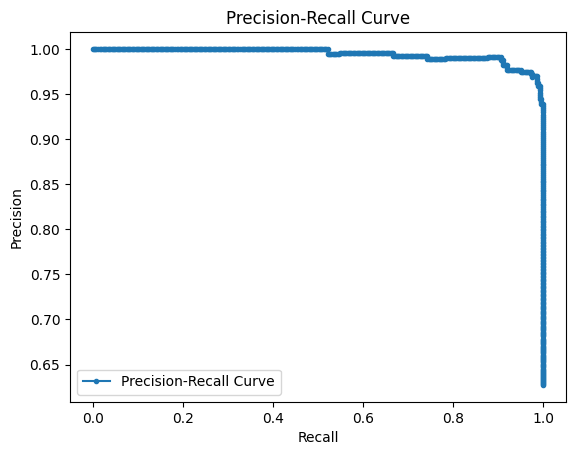

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, precision_recall_curve, f1_score, precision_score, recall_score
import xgboost as xgb

# Load the breast cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Set up stratified 10-fold cross-validation
cross_validator = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store results
true_values = []
predictions = []
probabilities = []

# Perform cross-validation
for train_index, test_index in cross_validator.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model = xgb.XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # Predict and store results
    preds = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]

    true_values.extend(y_test)
    predictions.extend(preds)
    probabilities.extend(probas)

# Calculate metrics
balanced_acc = balanced_accuracy_score(true_values, predictions)
auc_score = roc_auc_score(true_values, probabilities)
precision = precision_score(true_values, predictions)
recall = recall_score(true_values, predictions)
f1 = f1_score(true_values, predictions)

# Print metrics
print("Balanced Accuracy:", balanced_acc)
print("AUC:", auc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Precision-Recall Curve
precision_points, recall_points, _ = precision_recall_curve(true_values, probabilities)
plt.plot(recall_points, precision_points, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
